확률(Probability)이란, 어떠한 사건의 공간에서 특정 사건이 선택될 때 발생하는 불확실성을 수치적으로 나타낸 것이다.

### 종속성과 독립성

사건 E의 발생 여부가 사건 F의 발생 여부에 대한 정보(혹은 그 반대로)를 제공한다면, 두 사건 E와 F는 종속 사건(dependent events)라고 할 수 있다.  
그렇지 않다면 두 사건을 독립 사건(independant events)이다.

동전을 두 번 던질 때,
- 독립 사건: 각각의 동전이 앞면이 나오는 경우
- 종속 사건: 두 개의 동전이 모두 뒷면이 나오는 경우

### 조건부 확률

만약 두 사건이 독립 사건이라면, 사건 E와 F가 동시에 발생할 확률은 아래와 같다.
```
P(E,F) = P(E)P(F)
```

두 사건이 독립 사건이라는 보장이 없고, 사건 F의 확률이 0이 아닌 경우, 사건 E가 발생할 조건부 확률(conditional probability)는 다음과 같이 정의할 수 있다.
```
P(E|F) = P(E,F) / P(F)
```

이 식은 아래처럼 정리할 수도 있다.
```
P(E,F) = P(E|F)P(F)
```

만약 사건 E와 F가 독립이라면, 위 식은 아래처럼 변경할 수 있다.
```
P(E|F) = P(E)
```

이 식은, 사건 F가 발생해도 사건 E의 발생 여부에 대한 추가적인 정보를 알 수 없다는 것을 의미한다.

한 가족 내 두 아이들의 성별을 맞춰보자.  

다음 두 조건이 있다.
- 각 아이가 딸이거나 아들일 확률은 동일하다.
- 둘째의 성별은 첫째의 성별과 독립이다.


전체 발생할 수 있는 사건은 다음과 같다.
```
(아들, 아들), (아들, 딸), (딸, 아들), (딸, 딸)
```

그렇다면,
- 두 아이가 모두 딸이 아닌 경우: 1/4
- 딸 한 명, 아들 한 명인 경우: 1/2
- 두 아이가 모두 딸인 경우: 1/4

그렇다면, 첫째가 딸인 경우(사건 G), 두 아이가 모두 딸(사건 B)인 확률은 어떻게 될까?
```
P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/4 / 1/2 = 1/2

* 두 아이가 모두 딸이면서 첫째가 딸일 확률은, 두 아이가 모두 딸인 확률과 동일하다. (두 아이가 모두 딸이면 첫째도 항상 딸이기 때문)
```

딸이 최소 한 명인 경우(사건 L), 두 아이가 모두 딸일 확률은 어떻게 될까?
```
P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/4 / 3/4 = 1/3
```

딸이 최소 한 명인 경우(사건 L), 딸 한 명과 아들 한 명(사건 E)이 확률은 어떻게 될까?
```
P(E|L) = P(E,L)/P(L) = P(E)/P(L) = 1/2 / 3/4 = 2/3
```

만약 딸이 최소 한 명이라면, 딸 한 명과 아들 한 명일 확률이 두 명이 모두 딸일 확률보다 두 배나 높다.

In [26]:
# 수많은 가족을 만들어서 결과를 검증해보자
from __future__ import division
import random

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0 # 모두 딸
older_girl = 0 # 첫째가 딸
either_girl = 0 # 둘 중 한 명 딸

random.seed(0)
for _ in range(10000):
    older = random_kid()
    younger = random_kid()

    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl +=1

print "P(both | older):", both_girls / older_girl # 1/2
print "P(both | either):", both_girls / either_girl # 1/3

P(both | older): 0.504224798585
P(both | either): 0.341541328364


### 베이즈 정리

조건부 확률을 '반대로 뒤집는' 베이즈 정리(Bayes's Theorom)은 데이터 과학자들에게 무척 친숙한 존재다.  

가령, 사건 F가 발생했다는 가정 하에 사건 E가 발생할 확률이 필요하다고 해보자. P(E|F)  
하지만, 사건 E가 발생했다는 가정 하에 사건 F가 발생한 확률만 알고 있다. P(F|E)  

이 때 조건부 확률을 두 번 적용하면 아래처럼 정리할 수 있다. (베이즈 정리)
```
P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)

* P(E,F) = P(F|E)P(E)
```

또한, 사건 F를 '사건 F와 사건E가 모두 발생하는 경우'와 '사건 F는 발생하지만, 사건 E는 발생하지 않는 경우' 두 상호 배타적은 사건을 나눌 수 있다.
```
P(F) = P(F,E) + P(F,~E)
```

이를 이용하면, 베이즈 정리는 아래처럼 다시 정리할 수 있다.
```
P(E|F) = P(F|E)P(E) / [ P(F,E) + P(F,~E) ]
       = P(F|E)P(E) / [ P(F|E)P(E) + P(F|~E)P(~E) ]
```

예를 들어,
- 10000명 중 1명이 걸리는 질병이 있다. 질병이 있는 경우 "양성", 없는 경우 "음성"
- 질병이 있는 경우, 양성/음성을 판단하는 검사가 99% 확률로 정확한 판단을 내린다

그렇다면 양성 판정을 받았다는 것은 무엇을 의미할까?

```
사건 T = 양성 판정
사건 D = 질병에 걸렸다
```

양성 판정일 때, 실제로 병에 걸렸을 확률은? P(D|T)

```
# 질병에 걸릴 확률
P(D) = 1/10000 = 0.0001

# 특정 사람이 질병에 걸리지 않았을 확률
P(~D) = 1 - P(D) = 0.9999

# 질병에 걸렸을 때 양성 판정일 확률
P(T|D) = 0.99

# 질병에 걸리지 않았을 떄 양성 판정일 확률
P(T|~D) = 1 - P(T|D) = 0.01

# 양성 판정일 때, 질병에 걸렸을 확률
P(D|T) = P(D,T) / P(T)
       = P(T|D)P(D) / [ P(T,D) + P(T,~D) ]
       = P(T|D)P(D) / [ P(T|D)P(D) + P(T|~D)P(~D) ]
       = 0.99 * 0.0001  / ( 0.99 * 0.0001 + 0.01 * 0.9999)
       = 0.0098
       = 0.98%
```

즉, 양성 판정을 받은 사람 중 실제로 질병에 걸린 사람은 1%도 안된다.  
(이 예시는 임의의 사람을 대상을 대상으로 한다. 특정 증상을 보이는 사람들만 이 검사를 받는다면, 양성으로 판정되고 특정 증상을 보이는 조건을 전제로 조건부 확률을 계산해야 한다. 그러면 더 높은 확률 값이 나올 것이다)





### 확률 변수 (random variable)

확률 변수란 **특정 확률 분포와 연관되어 있는 변수**를 의미한다.

- 동전 던기지 시 값이 0인 확률변수의 확률은 0.5
- range(10) 확률변수의 경우, 각 변수의 값에 대한 확률은 0.1

기대값 = 확뷸변수의 확률을 해당 확률변수의 값으로 가중평균한 값

- 동전 던지기: 0 * 1/2 + 1 * 1/2 = 1/2
- range(10): 0 * 0.1 + 1 * 0.1 + ... + 9 * 0.1 = 4.5

두 사이의 성별 구분에서,
- 확률변수 X가 딸의 수를 나타낸다면,
  - X가 0일 확률: 1/4
  - X가 1일 확률: 1/2
  - X가 2일 확률: 1/4
- 확률변수 Y가 딸이 최소 한 명일 때 전체 딸의 수를 나타낸다면,
  - Y가 1일 확률: 2/3
  - Y가 2일 확률: 1/3


### 연속 분포 (continuous distribution)

동전 던지기는 각각의 결과에 확률을 계산해주는 *이산형 분포(discrete distribution)*을 따른다.  
하지만 대부분의 경우, 연속적인 결과에 대한 분포를 사용해 모델을 만들 것이다. 예를 들어, 균등 분포(uniform distribution)은 0과 1 사이의 모든 값에 동등한 비중을 준 분포이다.

0과 1 사이에 무한히 많은 숫자가 존재하기 때문에, 숫자 하나의 비중은 0일 것이다.  
이런 이유로, 밀도함수를 특정 구간에서 적분한 값으로 확률을 나타내는 *확률밀도함수(probability density function, pdf)*로 *연속분포(continuous distribution)*을 표현하겠다.

적분이 잘 기억나지 않는다면 아래처럼 생각할 수 있다.  
분포를 나타내는 어떤 밀도함수 f가 있고, h가 매우 작은 숫자라면, 분포에서 x와 x+h 사이의 값이 나올 확률은 h * f(x)로 근사해볼 수 있다. (넓이)

In [30]:
# 균등 분포의 확률밀도함수는 다음과 같다.
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

# 균등 분포를 따르는 확률 변수의 값이 0.2와 0.3일 확률은 (0.3 - 0.2) = 1/10

확률 변수의 값이 특정 값보다 작거나 클 확률은 누적분포함수(cumulative distribution function, cdf)를 더 많이 사용한다

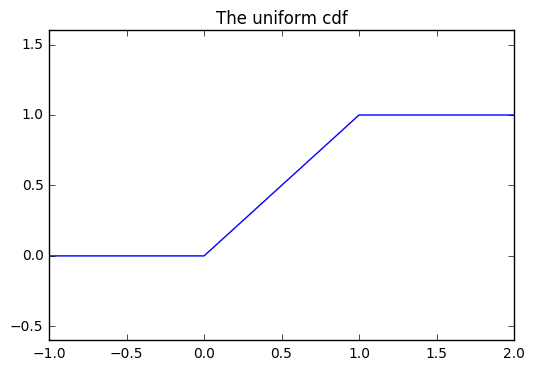

In [42]:
def uniform_cdf(x):
    """균등분포를 따르는 확률변수의 값이 x보다 작거나 같을 확률"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

# 그래프로 그려보자
from matplotlib import pyplot as plt
from __future__ import division

xs = [x / 10
     for x in range(-10, 21)]
ys = [uniform_cdf(x)
     for x in xs]

plt.plot(xs, ys)
plt.axis([-1, 2, -0.6, 1.6])
plt.title("The uniform cdf")
plt.show()

### 정규분포 (normal distribution)

정규분포는 종형 곡선 모양의 분포이며, 평균인 μ(ab)와 표준편차인 σ(시그마)의 두 파라미터로 정의한다.  
평균은 종의 중심이 어디인지를, 표준편차는 종의 폭이 얼마나 넓은 지를 나타낸다.

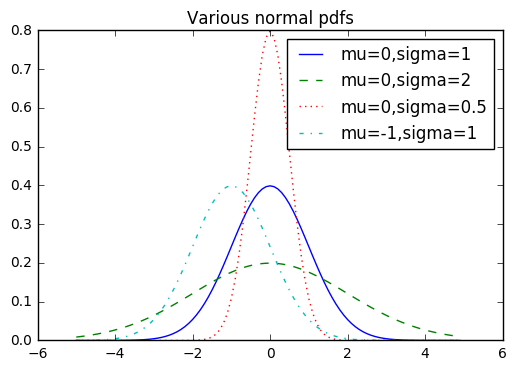

In [46]:
# 정규분포의 밀도함수는 아래와 같이 구현할 수 있다
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

# 정규분포를 그려보자
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various normal pdfs")
plt.show()

**표준정규분포(Standard normal distribution)**은 μ=0 이고 σ=1 인 정규분포를 의미한다.  

만약 Z가 표준정규분포의 확률변수를 나타낸다면, 아래처럼 X도 평균이 μ이고 표준편차가 σ인 정규분포로 표현할 수 있다.
```
X = σZ + μ
```

반대로 X가 평균이 μ이고 σ인 정규분포의 확률변수라면, 다음과 같이 표준정규분포로 표현할 수 있다.
```
Z = (X - μ) / σ
```

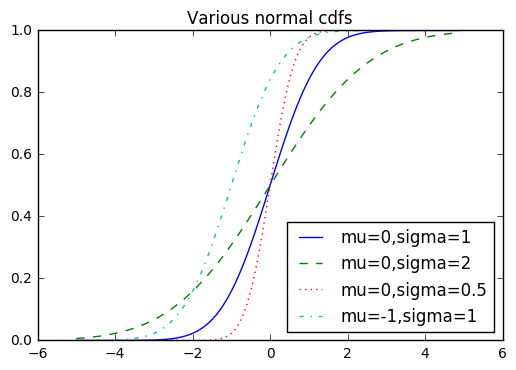

In [49]:
# 정규분포의 누적분포함수는 파이썬의 math.erf를 사용하면 된다
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# 누적분포함수를 그려보자
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Various normal cdfs")
plt.show()

가끔식 특정 확률을 갖는 확률변수의 값을 찾기 위해, normal_cdf의 역함수가 필요할 수도 있다.  
누적분포함수의 역함수를 쉽게 계산할 수는 없지만, 누적분포함수가 연속 및 증가 함수라는 점을 고려해 이진 검색을 사용해 구할 수 있다.

In [51]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """이짐 검색으로 역함수를 근사"""

    # 표준정규분포가 아니면 변환
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10)은 0에 근접
    hi_z, hi_p = 10.0, 1 # normal_cdf(10)은 1에 근접
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # 중간값
        mid_p = normal_cdf(mid_z) # 중간값의 누적분포
        if mid_p < p: # 중간값이 너무 작으면 더 큰 값을 검색
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

# 위 함수는 원하는 확률에 가까워질 때까지 표준정규분포의 구간을 반복적으로 이등분해 값을 찾는다
print inverse_normal_cdf(0.2) # 누적 확률값이 0.2인 확률변수를 구한다

-0.841627120972


### 중심극한정리

정규분포가 중요한 이유 중 하나는 **중심극한정리(central limit theorem)** 때문이다. 중심극한정리는 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 정리이다.

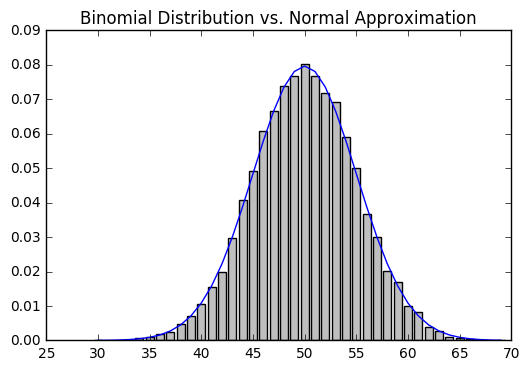

In [67]:
# 이항 확률변수(binomial random variable)
# 이항 확률변수는 n과 p 두 가지 파라미터로 구성된다

from collections import Counter

# 각 베르누이 확률변수의 값은 p의 확률로 1, 1-p의 확률로 0이 된다.
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

# 이항 확률변수는 n개의 독립적인 베르누이 확률변수(Bernoulli random variable)를 더한 것이다
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    # 확률이 p인 베르누이 시행을 n번만큼 했을 때의 결과의 합
    # 예) 동전 던지기를 100번했을 때 앞면이 나오는 수의 합
    #
    # 이 시행을 num_points만큼 수행한 데이터
    data = [binomial(n, p) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대그래프로 표현
    histogram = Counter(data) # 예) 앞면이 나온 횟수의 수
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    # 베르누이 확률변수의 평균은 p이다. 중심극한정리에 따르면 n이 적당히 크면 평균이 np가 된다.
    mu = p * n
    # 표준편차는 root(p(1-p))이다. 중심극한정리에 따르면 표준편차는 root(n * p(1-p))가 된다.
    sigma = math.sqrt(n * p * (1 - p))
    
    # 근사된 정규분포를 라인 차트로 표현한다
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)

    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(0.5, 100, 10000)

평범한 동전을 100번 던져서 앞면이 60번 나올 확률을 알고 싶다고 해보자.  
중식극한정리의 핵심은, 이 확률을 (평균이 50이고 표준편차가 5인) 정규분포의 확률분포가 60보다 클 확률로 근사할 수 있다는 점이다.
- 평균 = n \* p = 100 * 0.5 = 50
- 표준편차 = root(n \* p \* (1 - p)) = 100 \* 0.5 \* 0.5 = 5